In [1]:
import os
import pip
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in 2022 Childrens recode
df = pd.read_sas('./../shared_data_read_only/Data/DHS/GH_2022_DHS/GHKR8BSD/GHKR8BFL.SAS7BDAT')
# df.head()

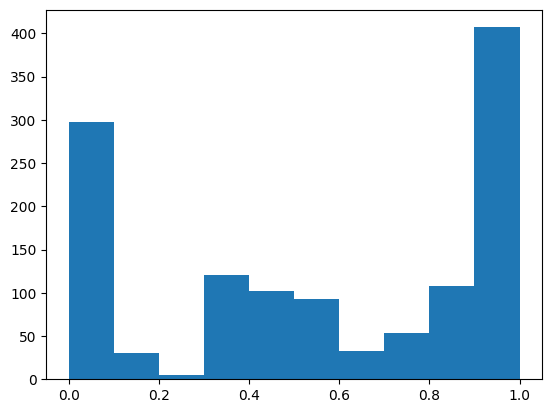

In [3]:
colLen = len(df)
nanFracs = np.zeros(len(df.columns))
for i, col in enumerate(df.columns):
    nanFrac = df[col].isna().sum() / colLen
    nanFracs[i] = nanFrac
    # if (nanFrac >= 0.3): # Insist that we have more than 70% data to care.
    #     continue
    # print(f'Col ID: {col}, Col Nan Frac {nanFrac}')

plt.hist(nanFracs)
plt.show()

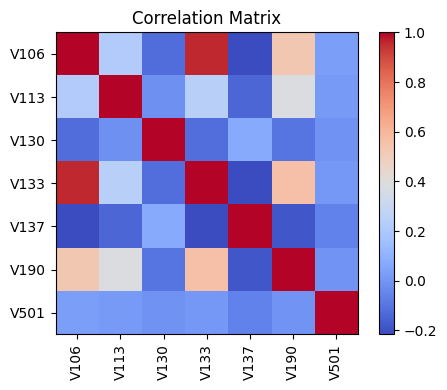

In [4]:
columns_list = ['V106', 'V113', 'V130', 'V133', 'V137', 'V190', 'V501']
df_selected = df[columns_list]
# cov_matrix = df_selected.cov()
cov_matrix = df_selected.corr()
plt.figure(figsize=(5, 4))
plt.imshow(cov_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(np.arange(len(columns_list)), columns_list, rotation=90)
plt.yticks(np.arange(len(columns_list)), columns_list)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()